<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/series_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
base = "/Users/fvb/Projects/jupyter/series/1/Series/"
files = [
    "international-airline-passengers.csv",
    "daily-total-female-births-in-cal.csv",
    "mean-monthly-air-temperature-deg.csv",
    "monthly-boston-armed-robberies-j.csv",
    "monthly-sales-of-company-x-jan-6.csv",
    "weekly-closings-of-the-dowjones-.csv"
]

In [ ]:
%matplotlib inline

In [ ]:
def show_graph(y, title, lags=None, figsize=(14, 2), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    # return y
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (1, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0))
        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(title)
        plt.tight_layout()

In [ ]:
def get_p_value(series):
    dftest = adfuller(series, autolag='AIC')
    return dftest[1]

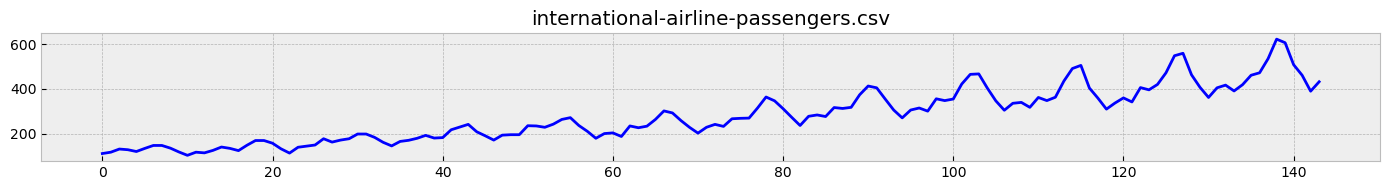

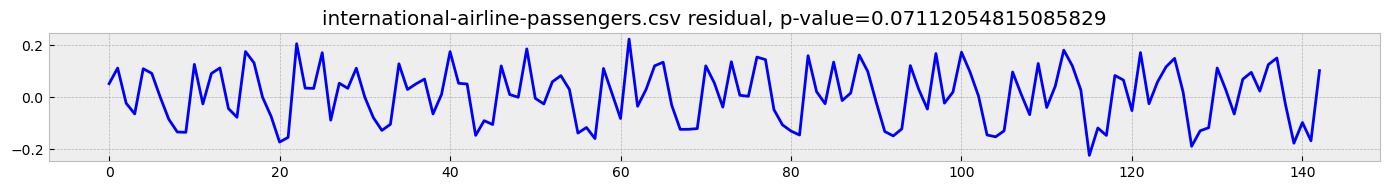

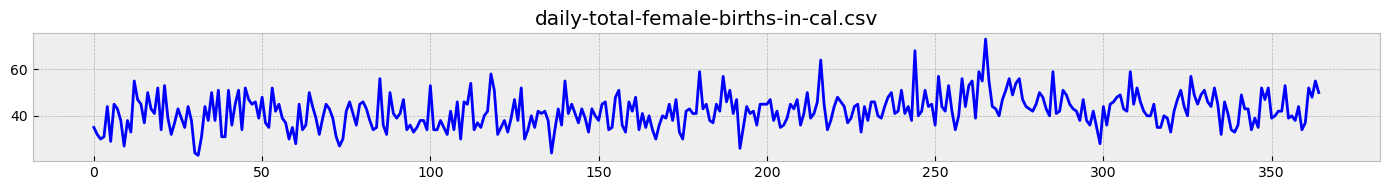

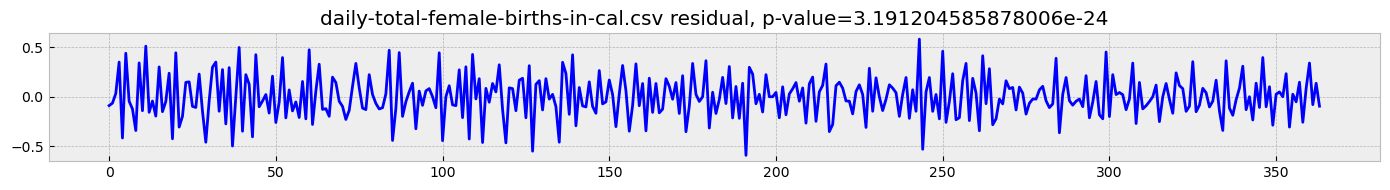

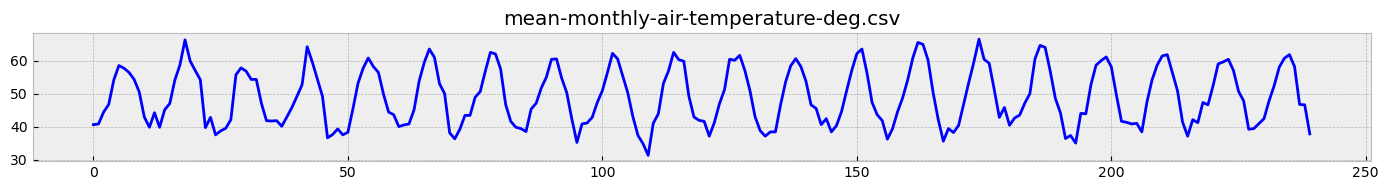

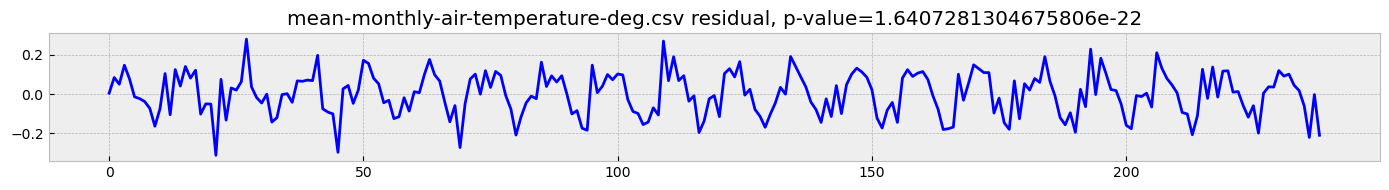

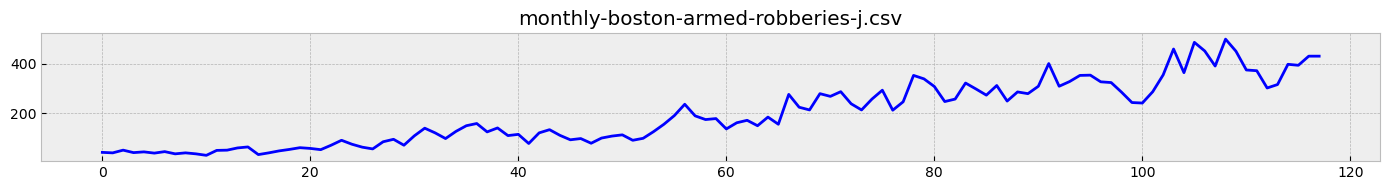

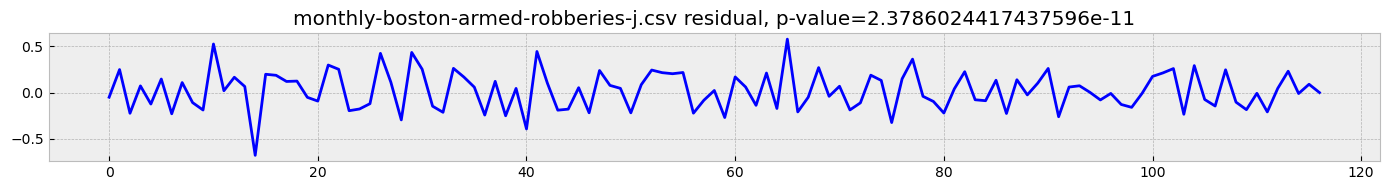

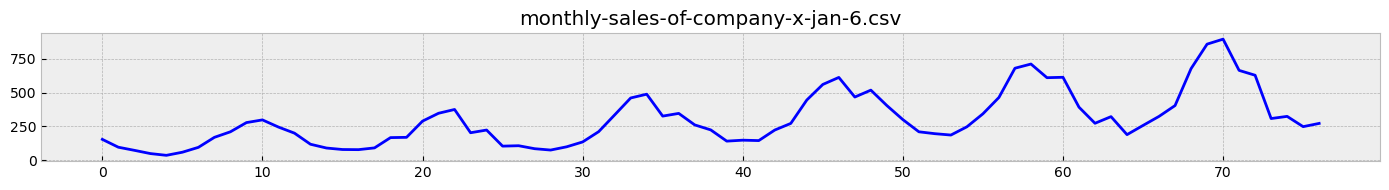

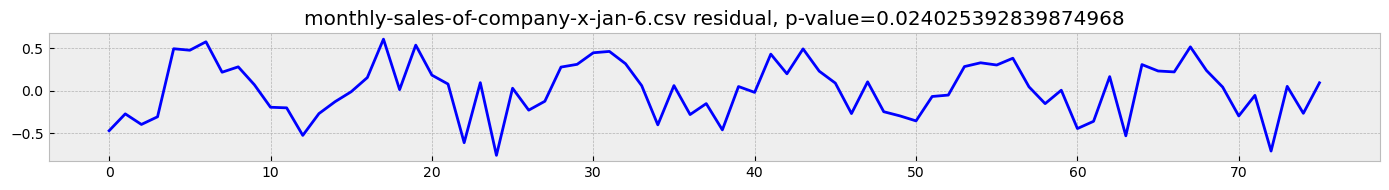

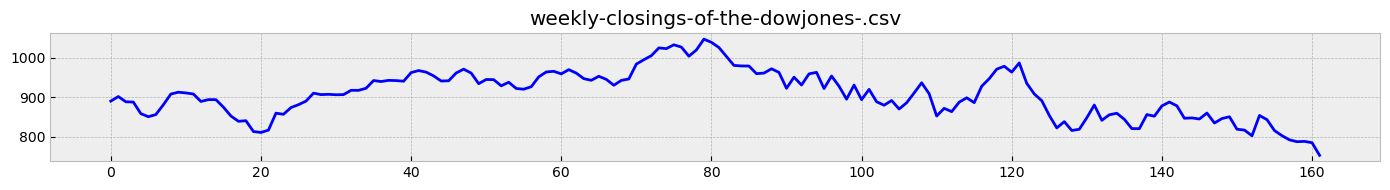

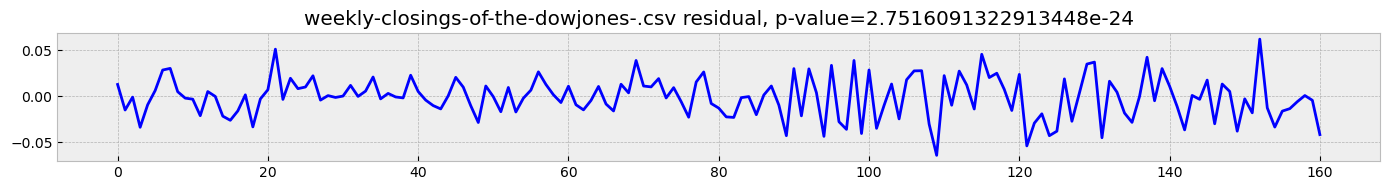

In [ ]:
for sf in files:
    series = pd.read_csv(base + sf).iloc[:,1] #['Count']
    show_graph(series, sf)
    series = boxcox(series, 0)
    series = series[1:] - series[:-1]
    p_value = get_p_value(series)
    show_graph(series, f"{sf} residual, p-value={p_value}")



